# CNN, 영상에 최적화. 필터링 개념, 지도학습!
인접한것들의 공통점, 등등 멀리 있는 픽셀들과의 가까이 붙어서 비교.
맥스풀링, 컨볼루션

In [1]:
import tensorflow as  tf
import numpy as np
import pandas as pd

In [4]:
a=[[1,5,4,3],
   [8,4,1,4],
   [1,2,3,3],
   [6,5,3,1]
    
]

b=[ [1,1,1,1],
   [-1,-1,-1,-1],
   [2,2,2,2],
   [3,3,3,3]
    
]

In [16]:
X= tf.constant(a)
Y= tf.constant(b)

In [19]:
sess=tf.Session()
Z=sess.run(tf.reduce_sum(np.dot(X,Y)))
Z

59

In [26]:
sess=tf.Session()
T=sess.run(tf.reduce_sum(tf.multiply(X,Y)))
T

59

# Convolution layer

In [57]:
import matplotlib.pyplot as plt

sess=tf.Session()
image=np.array([[[[1],[2],[3] ],
                [[4],[5],[6]],
                [[7],[8],[9]]],
               [[[1],[2],[3] ],
                [[4],[5],[6]],
                [[7],[8],[9]]]],dtype=np.float32)

print(image.shape)


(2, 3, 3, 1)


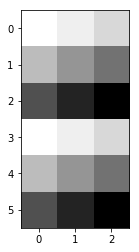

In [67]:
plt.imshow(image.reshape([6,3]),cmap="Greys")

In [69]:
sess=tf.InteractiveSession()
image=image.reshape([2,3,3,1])
print("image.shape", image.shape)
print(image)
w_filter=tf.constant([[ [[1.]], [[1.]]],
                     [[[1.]],[[1.]]]
                     ])
print("filter image", w_filter.shape)

image.shape (2, 3, 3, 1)
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]


 [[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
filter image (2, 2, 1, 1)


conv2d_img.show (2, 2, 2, 1)
[[12. 16.]
 [24. 28.]
 [12. 16.]
 [24. 28.]]


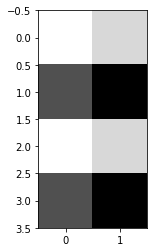

In [66]:
conv2d=tf.nn.conv2d(input=image, filter=w_filter, strides=[1,1,1,1],padding= "VALID")
conv2d_img=conv2d.eval()

print("conv2d_img.show", conv2d_img.shape)
print(conv2d_img.reshape(4,2))
plt.imshow(conv2d_img.reshape(4,2), cmap="Greys")

sess.close()

# array 의 차원[ 1,1,1,1], strides 

In [75]:
a=np.array([1,2,3,4,5,6,7,8,9])
a.reshape([1,3,3,1])
# 어레이 크기와 표현을 잘 해야함.
# filter( width,height,color,filter-count 갯수)

array([[[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]]])

In [86]:
a=[]
for i in range(50):
    a.append(i)
    result=a
a=np.array(a)
a=a[1:]
a.reshape(1,7,7,1)

array([[[[ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7]],

        [[ 8],
         [ 9],
         [10],
         [11],
         [12],
         [13],
         [14]],

        [[15],
         [16],
         [17],
         [18],
         [19],
         [20],
         [21]],

        [[22],
         [23],
         [24],
         [25],
         [26],
         [27],
         [28]],

        [[29],
         [30],
         [31],
         [32],
         [33],
         [34],
         [35]],

        [[36],
         [37],
         [38],
         [39],
         [40],
         [41],
         [42]],

        [[43],
         [44],
         [45],
         [46],
         [47],
         [48],
         [49]]]])

conv2d_img.shape (1, 3, 5, 1)
[[ 81.  90.  99. 108. 117.]
 [207. 216. 225. 234. 243.]
 [333. 342. 351. 360. 369.]]


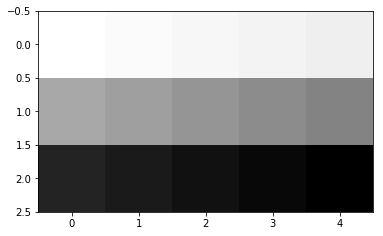

In [103]:
image=np.arange(1,50,dtype=np.float32).reshape(1,7,7,1)
w_filter=tf.constant(np.ones(9,dtype=np.float32).reshape(3,3,1,1))
conv2d=tf.nn.conv2d(input=image,filter=w_filter,strides=[1,2,1,1],padding="VALID")
conv2d_img=conv2d.eval()

print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,5))
plt.imshow(conv2d_img.reshape(3,5),cmap="Greys")

sess.close()

# Padding, 덧 씌우는것

In [104]:
# padding="VALID" 는 안씌우는것
# padding'SAME" 같은 크기의 액티베이션 맵 만들기
# 필터에 비해 인풋이 작을때. 쓴다

conv2d_img.shape (1, 4, 4, 1)
[[ 20.  39.  51.  40.]
 [ 93. 153. 171. 123.]
 [177. 279. 297. 207.]
 [160. 249. 261. 180.]]


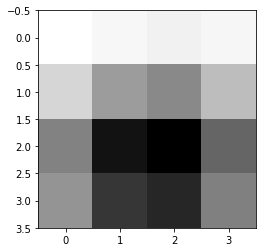

In [116]:
image=np.arange(1,50,dtype=np.float32).reshape(1,7,7,1)
w_filter=tf.constant(np.ones(9,dtype=np.float32).reshape(3,3,1,1))
conv2d=tf.nn.conv2d(input=image,filter=w_filter,strides=[1,2,2,1],padding="SAME")
conv2d_img=conv2d.eval()

print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(4,4))
plt.imshow(conv2d_img.reshape(4,4),cmap="Greys")

sess.close()

#strides, 이미지, 가로,세로,

# practice

In [122]:
image=np.ones(25)
image=image.reshape([1,5,5,1])

In [123]:
print(image.shape)

(1, 5, 5, 1)


In [131]:
filter=np.ones(9)
filter=filter.reshape(3,3,1,1)
filter

array([[[[1.]],

        [[1.]],

        [[1.]]],


       [[[1.]],

        [[1.]],

        [[1.]]],


       [[[1.]],

        [[1.]],

        [[1.]]]])

In [141]:
sess=tf.InteractiveSession()
co_val=tf.nn.conv2d(image,filter,strides=[1,1,1,1],padding="VALID")
co_same=tf.nn.conv2d(image,filter,strides=[1,1,1,1],padding="SAME")
res1=co_val.eval()
res2=co_same.eval()

print(res2.shape)

sess.close()

(1, 5, 5, 1)


In [180]:
a=np.ones(121)
a=a.reshape(1,11,11,1)
filter=np.ones(36)
filter=filter.reshape(6,6,1,1)
print(filter.shape, a.shape)

(6, 6, 1, 1) (1, 11, 11, 1)


(1, 6, 6, 1) (1, 11, 11, 1) (1, 6, 6, 1) (1, 4, 4, 1)


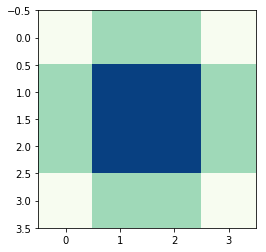

In [181]:
sess=tf.InteractiveSession()
co_val=tf.nn.conv2d(a,filter,strides=[1,1,1,1],padding="VALID")
co_same=tf.nn.conv2d(a,filter,strides=[1,1,1,1],padding="SAME")
# 16 by 16 이 되어야 padding=same이 된다.
co_same2=tf.nn.conv2d(a,filter,strides=[1,2,2,1],padding="SAME")
# padding=same 이고 stride가 2개면 나누기 해서 반올림
co_same3=tf.nn.conv2d(a,filter,strides=[1,3,3,1],padding="SAME")

res1=co_val.eval()
res2=co_same.eval()
res3=co_same2.eval()
res4=co_same3.eval()

print(res1.shape, res2.shape,res3.shape,res4.shape)
plt.imshow(res4.reshape(4,4),cmap="GnBu")

# Pooling
데이터 사이즈를 줄이거나 강조할때 사용, 겹치지 않게 하는게 보통의 원칙이다. 필터와 스트라이드 사이즈 같게

In [177]:
sess=tf.InteractiveSession()
a=np.arange(1,37,dtype=np.float32).reshape(1,6,6,1)
#b=np.ones(25).reshape(5,5,1,1)
max=tf.nn.max_pool(a,ksize=[1,3,3,1],strides=[1,3,3,1],padding="VALID")
# 6 by 6 을 3 by 3 필터 주면 4 by 4 나온다, 여기에 스트라이드 3 by 3 주면 2by 2 가능

avg=tf.nn.avg_pool(a,ksize=[1,3,3,1],strides=[1,3,3,1],padding="VALID")

max=max.eval()
avg=avg.eval()

print(max.reshape(2,2), avg.reshape(2,2))

[[15. 18.]
 [33. 36.]] [[ 8. 11.]
 [26. 29.]]


# Filter ,reshape 이랑 비슷.  n by m ,in_channel, out channel

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


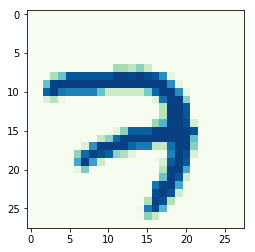

In [191]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data", one_hot=True)

img=mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0])
plt.imshow(img,cmap="GnBu")

Tensor("Conv2D_147:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)


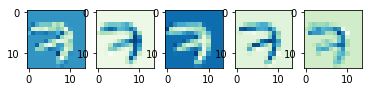

In [206]:
sess=tf.InteractiveSession()

img=img.reshape(1,28,28,1) # 몇개, n 바이 n, 채널
filter=np.random.random((3,3,1,5))-0.5 # n 바이 n,채널, 몇개 ...///필터가 5개라 이미지 5개
con=tf.nn.conv2d(img,filter,strides=[1,2,2,1],padding="SAME")
print(con)
#(1, 14, 14, 5)

con_img=con.eval()
con_img=np.swapaxes(con_img,0,3)
print(con_img.shape)

for i, one_img in enumerate(con_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(14,14),cmap="GnBu")

Tensor("Conv2D_213:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_214:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_215:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_216:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_217:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_218:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_219:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_220:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_221:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)
Tensor("Conv2D_222:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 14, 14, 1)


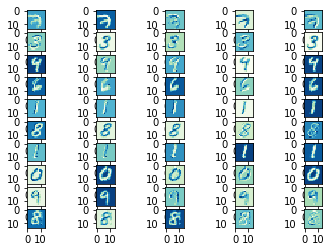

In [225]:
sess=tf.InteractiveSession()

for i in range(10):
    img=mnist.train.images[i].reshape(28,28)


    img=img.reshape(1,28,28,1) # 몇개, n 바이 n, 채널
    filter=np.random.random((3,3,1,5))-0.5 # n 바이 n,채널, 몇개 ...///필터가 5개라 이미지 5개
    con=tf.nn.conv2d(img,filter,strides=[1,2,2,1],padding="SAME")
    print(con)
#(1, 14, 14, 5)

    con_img=con.eval()
    con_img=np.swapaxes(con_img,0,3)
    print(con_img.shape)

    for j, one_img in enumerate(con_img):
        plt.subplot(10,5,i*5+j+1),plt.imshow(one_img.reshape(14,14),cmap="GnBu") # 행이 다섯개씩 커지니까! 
        
# subplot( row, column, index)

In [226]:
#from tensorflow.keras.datasets import mnist
#(x_train, y_train),(x_test,y_test) = mnist.load_data()
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#batch_xs, bat_ys = mnist.train.next_batch(100)
#input placeholders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])

Y = tf.placeholder(tf.float32, [None, 10])

#Conv L1 ImgIn shape=(?, 28, 28, 1)
# Filter W1 size=[3,3,1,6]
W1 = tf.Variable(tf.random_normal([3,3,1, 32],stddev=0.03))

#L1
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1_img = tf.nn.relu(L1)

#Max pooling MP1 size 
MP1 = tf.nn.max_pool(L1_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#Conv L2 ImgIn shape
#Filter W2 size
W2 = tf.Variable(tf.random_normal([3,3,32, 64],stddev=0.03))

#L2
L2 = tf.nn.conv2d(MP1, W2, strides=[1,1,1,1], padding='SAME')
L2_img = tf.nn.relu(L2)

#MP2
MP2 = tf.nn.max_pool(L2_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
MP2 = tf.reshape(MP2, [-1, 7 * 7 * 64])

W3=tf.Variable(tf.random_normal([7*7*64,10]))
b = tf.Variable(tf.random_normal([10]))
#몇몇 곳에서는 prediction 혹은 result라고 하기도 한다. hypothesis는 가설로 번역될 수 있고, 예상되는 값이라는 의미이다.
hypothesis = tf.matmul(MP2,W3)+b
learning_rate = 0.001
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#Training and Evaluation
#initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15
batch_size = 100

for epoch in range(training_epochs):
    average_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run ([cost, optimizer], feed_dict=feed_dict)
        average_cost += c /total_batch
    print('Epoch:', "%04d" % (epoch + 1), 'cost =', '{:.9f}'.format(average_cost))
                
print('Learning Finished!')
                
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


W0719 17:41:50.146776  8368 deprecation.py:323] From <ipython-input-226-cab0a8892ef3>:41: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch: 0001 cost = 0.263380494
Epoch: 0002 cost = 0.085458098
Epoch: 0003 cost = 0.062555175
Epoch: 0004 cost = 0.049968619
Epoch: 0005 cost = 0.041135965
Epoch: 0006 cost = 0.035825281
Epoch: 0007 cost = 0.028825223
Epoch: 0008 cost = 0.025420396
Epoch: 0009 cost = 0.020903260
Epoch: 0010 cost = 0.017724756
Epoch: 0011 cost = 0.015470881
Epoch: 0012 cost = 0.013585315
Epoch: 0013 cost = 0.010529014
Epoch: 0014 cost = 0.009999726
Epoch: 0015 cost = 0.009535036
Learning Finished!
Accuracy: 0.9869
